<a href="https://colab.research.google.com/github/ever-oli/MLBy22/blob/main/IrisFlowerClassification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Iris dataset...
Dataset loaded successfully with 150 samples.
Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

Generating feature scatter plots...


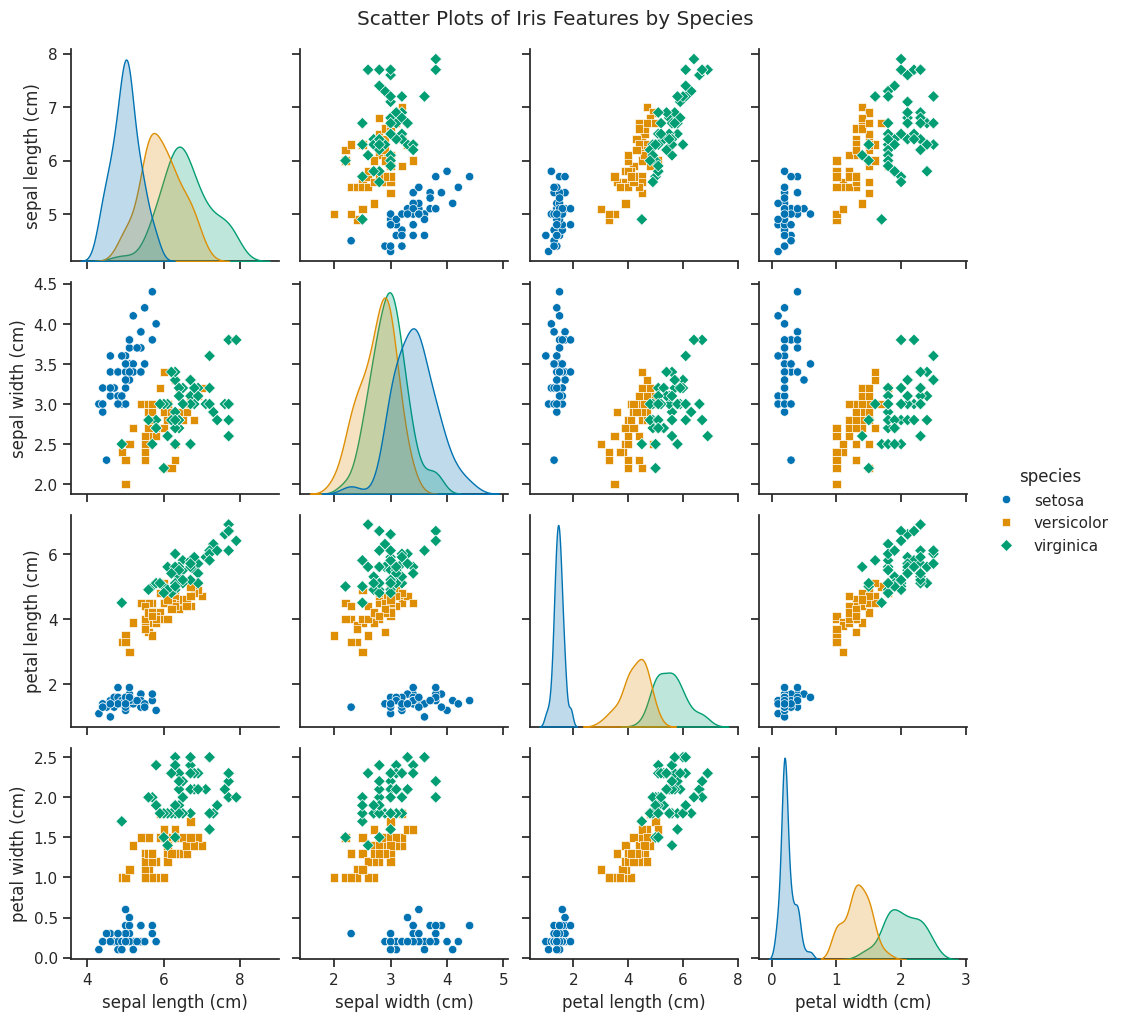

Data split into training and testing sets.

Training models and evaluating accuracy...

Decision Tree trained.
Random Forest trained.
Support Vector Machine (SVM) trained.

FINAL ACCURACY COMPARISON
Decision Tree                 : 100.00%
Random Forest                 : 100.00%
Support Vector Machine (SVM)  : 100.00%


In [3]:

# IRIS DATASET CLASSIFICATION & ALGORITHM COMPARISON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

sns.set_theme(style="ticks")


# Data Loading

print("Loading the Iris dataset...")
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(f"Dataset loaded successfully with {df.shape[0]} samples.")
print(f"Features: {', '.join(iris.feature_names)}\n")

# Feature Visualization

print("Generating feature scatter plots...")
# A pairplot maps out scatter plots for every combination of features,
# color-coded by the species to show how easily separable the classes are.
g = sns.pairplot(df, hue="species", palette="colorblind", markers=["o", "s", "D"])
g.fig.suptitle("Scatter Plots of Iris Features by Species", y=1.02)
plt.show()


# Separate the features (X) from the target labels (y)
X = iris.data
y = iris.target

# Split the data: 80% for training the models, 20% for testing their accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.\n")


# Model Training and Evaluation

print("Training models and evaluating accuracy...\n")

# Initialize a dictionary to store our models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine (SVM)": SVC(random_state=42, kernel='linear')
}

# Dictionary to store the accuracy results
results = {}

# Loop through each model, train it, predict, and score it
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the unseen test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

    print(f"{name} trained.")


# 6. Final Comparison

print("\n" + "="*40)
print("FINAL ACCURACY COMPARISON")
print("="*40)

# Sort results by accuracy in descending order
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

for name, acc in sorted_results.items():
    # Format accuracy as a percentage
    print(f"{name:<30}: {acc * 100:.2f}%")
print("="*40)